<div style="position: relative; text-align: center; color: white; height: 400px; width: 100%;">
  <img src="images/portada_ML.webp" alt="Logo del Proyecto" style="width: 100%; height: 100%; object-fit: cover; opacity: 0.7;">
  <div style="position: absolute; top: 50%; left: 50%; transform: translate(-50%, -50%); width: 80%;">
    <h1 style="font-size: 2.5em; background-color: rgba(0, 0, 0, 0.5); padding: 10px;">
      Simulador de Batallas de Superhéroes
    </h1>
    <h2 style="font-size: 1.5em; background-color: rgba(0, 0, 0, 0.5); padding: 5px;">
      Un Enfoque Basado en Machine Learning para Predecir Resultados en el Universo de Cómics y Películas
    </h2>
  </div>
</div>


Bibliotecas 

In [59]:
import ast
import bootcampviztools as bt
import modulo_toolbox as mlt
import numpy as np
import pandas as pd
import seaborn as sns
import toolbox_ML as tl
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


CARGAR DATA Y VISUALIZACION

In [30]:
df_pred_battles = pd.read_csv('./data/MCU_DC_final_limpio.csv')

In [31]:
df_pred_battles.info()
df_pred_battles.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48319 entries, 0 to 48318
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Heroe 1              48319 non-null  object
 1   Heroe 2              48319 non-null  object
 2   Resultado_Comics     48319 non-null  int64 
 3   Resultado_Peliculas  48319 non-null  int64 
 4   Resultado_Combinado  48319 non-null  int64 
 5   Universe_1           48319 non-null  object
 6   Intelligence_1       48319 non-null  int64 
 7   Strength_1           48319 non-null  int64 
 8   Speed_1              48319 non-null  int64 
 9   Durability_1         48319 non-null  int64 
 10  Power_1              48319 non-null  int64 
 11  Combat_1             48319 non-null  int64 
 12  Tier_1               48319 non-null  int64 
 13  Tier2_1              48319 non-null  int64 
 14  Superpowers_1        48319 non-null  object
 15  Universe_2           48319 non-null  object
 16  Inte

,Heroe 1,Heroe 2,Resultado_Comics,Resultado_Peliculas,Resultado_Combinado,Universe_1,Intelligence_1,Strength_1,Speed_1,Durability_1,...,Universe_2,Intelligence_2,Strength_2,Speed_2,Durability_2,Power_2,Combat_2,Tier_2,Tier2_2,Superpowers_2
0,Envy,Ancient One,2,1,2,DC Extended Universe,65,65,65,40,...,Marvel Cinematic Universe,85,8,25,25,90,100,4,0,"['Anti-Gravity', 'Astral Projection', 'Dimensi..."
1,Warlock,Ancient One,1,2,1,Marvel Cinematic Universe,45,50,25,35,...,Marvel Cinematic Universe,85,8,25,25,90,100,4,0,"['Anti-Gravity', 'Astral Projection', 'Dimensi..."
2,Deadshot,Ancient One,2,1,2,DC Extended Universe,60,1,6,7,...,Marvel Cinematic Universe,85,8,25,25,90,100,4,0,"['Anti-Gravity', 'Astral Projection', 'Dimensi..."
3,Doctor Fate,Ancient One,1,2,1,DC Extended Universe,85,75,60,45,...,Marvel Cinematic Universe,85,8,25,25,90,100,4,0,"['Anti-Gravity', 'Astral Projection', 'Dimensi..."
4,Cull Obsidian,Ancient One,1,2,1,Marvel Cinematic Universe,60,75,20,40,...,Marvel Cinematic Universe,85,8,25,25,90,100,4,0,"['Anti-Gravity', 'Astral Projection', 'Dimensi..."


LIMPIEZA DATOS

In [32]:
# # Normalizacion Heroe 1 y Heroe 2 
df_pred_battles['Heroe 1'] = df_pred_battles['Heroe 1'].str.strip().str.title()
df_pred_battles['Heroe 2'] = df_pred_battles['Heroe 2'].str.strip().str.title()

df_pred_battles[['Heroe 1', 'Heroe 2']].head()

,Heroe 1,Heroe 2
0,Envy,Ancient One
1,Warlock,Ancient One
2,Deadshot,Ancient One
3,Doctor Fate,Ancient One
4,Cull Obsidian,Ancient One


In [33]:
# Normalizar valores en las columnas "Universe_1" y "Universe_2"
df_pred_battles['Universe_1'] = df_pred_battles['Universe_1'].str.strip().str.title()
df_pred_battles['Universe_2'] = df_pred_battles['Universe_2'].str.strip().str.title()

In [34]:
# Mapeo de los universos 
mapping_universe = {
    'Dc Extended Universe': 0,
    'Marvel Cinematic Universe': 1
}

# Aplicar la transformación
df_pred_battles['Universe_1'] = df_pred_battles['Universe_1'].map(mapping_universe)
df_pred_battles['Universe_2'] = df_pred_battles['Universe_2'].map(mapping_universe)

df_pred_battles[['Universe_1', 'Universe_2']].head()


,Universe_1,Universe_2
0,0,1
1,1,1
2,0,1
3,0,1
4,1,1


In [35]:
# Mostrar las columnas superpoderes
superpowers_columns = [col for col in df_pred_battles.columns if 'Superpowers' in col]
df_pred_battles[superpowers_columns].head()


,Superpowers_1,Superpowers_2
0,"['Accelerated Healing', 'Cold Resistance', 'Du...","['Anti-Gravity', 'Astral Projection', 'Dimensi..."
1,"['Durability', 'Energy Blasts', 'Enhanced Cond...","['Anti-Gravity', 'Astral Projection', 'Dimensi..."
2,"['Intelligence', 'Marksmanship', 'Peak Human C...","['Anti-Gravity', 'Astral Projection', 'Dimensi..."
3,"['Astral Projection', 'Cloth Manipulation', 'C...","['Anti-Gravity', 'Astral Projection', 'Dimensi..."
4,"['Cold Resistance', 'Durability', 'Endurance',...","['Anti-Gravity', 'Astral Projection', 'Dimensi..."


In [36]:
# Contar las cadenas únicas completas en Superpowers_1
unique_complete_lists = df_pred_battles['Superpowers_1'].nunique()
print(f"Número de listas de superpoderes únicas en Superpowers_1: {unique_complete_lists}")

# Contar los superpoderes individuales únicos después de explotar las listas
unique_individual_superpowers = df_pred_battles['Superpowers_1'].apply(ast.literal_eval).explode().nunique()
print(f"Número de superpoderes individuales únicos en Superpowers_1: {unique_individual_superpowers}")

Número de listas de superpoderes únicas en Superpowers_1: 221
Número de superpoderes individuales únicos en Superpowers_1: 364


In [37]:
# Extraer superpoderes únicos
superpowers_1 = df_pred_battles['Superpowers_1'].apply(ast.literal_eval)
superpowers_2 = df_pred_battles['Superpowers_2'].apply(ast.literal_eval)

all_superpowers = pd.concat([superpowers_1.explode(), superpowers_2.explode()]).unique()
all_superpowers

array(['Accelerated Healing', 'Cold Resistance', 'Durability',
       'Electricity Resistance', 'Endurance', 'Energy Resistance',
       'Fire Resistance', 'Heat Resistance', 'Intelligence',
       'Invulnerability', 'Radiation Immunity', 'Reflexes',
       'Regeneration', 'Self-Sustenance', 'Stamina', 'Super Speed',
       'Super Strength', 'Toxin and Disease Resistance', 'Agility',
       'Dexterity', 'Flight', 'Immortality', 'Jump', 'Stealth', 'Envy',
       'Energy Blasts', 'Enhanced Condition', 'Space Survivability',
       'Acrobatics', 'Energy Beams', 'Energy Manipulation', 'Fearless',
       'Heat Generation', 'Illumination', 'Interstellar Travel',
       'Longevity', 'Marksmanship', 'Master Martial Artist', 'Warlock',
       'Peak Human Condition', 'Weapons Master', 'Weapon-based Powers',
       'Master Tactician', 'White Ranked Warriors', 'Astral Projection',
       'Cloth Manipulation', 'Duplication', 'Energy Constructs',
       'Extrasensory Perception', 'Force Fields', 'Hy

In [39]:
df_pred_battles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48319 entries, 0 to 48318
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Heroe 1              48319 non-null  object
 1   Heroe 2              48319 non-null  object
 2   Resultado_Comics     48319 non-null  int64 
 3   Resultado_Peliculas  48319 non-null  int64 
 4   Resultado_Combinado  48319 non-null  int64 
 5   Universe_1           48319 non-null  int64 
 6   Intelligence_1       48319 non-null  int64 
 7   Strength_1           48319 non-null  int64 
 8   Speed_1              48319 non-null  int64 
 9   Durability_1         48319 non-null  int64 
 10  Power_1              48319 non-null  int64 
 11  Combat_1             48319 non-null  int64 
 12  Tier_1               48319 non-null  int64 
 13  Tier2_1              48319 non-null  int64 
 14  Superpowers_1        48319 non-null  object
 15  Universe_2           48319 non-null  int64 
 16  Inte

Separacion Train - Test

In [46]:
# Selección de características y variable objetivo
features = [
    'Intelligence_1', 'Strength_1', 'Speed_1', 'Durability_1', 'Power_1', 'Combat_1', 'Tier_1', 'Tier2_1', 'Universe_1',
    'Intelligence_2', 'Strength_2', 'Speed_2', 'Durability_2', 'Power_2', 'Combat_2', 'Tier_2', 'Tier2_2', 'Universe_2']

target = 'Resultado_Combinado'

X = df_pred_battles[features]
y = df_pred_battles[target]

In [47]:
# Division datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((38655, 18), (9664, 18), (38655,), (9664,))

MINI-EDA

In [50]:
tl.describe_df(df_pred_battles)

,Heroe 1,Heroe 2,Resultado_Comics,Resultado_Peliculas,Resultado_Combinado,Universe_1,Intelligence_1,Strength_1,Speed_1,Durability_1,...,Has_Extrasensory Perception_1,Has_Extrasensory Perception_2,Has_Force Fields_1,Has_Force Fields_2,Has_Hypnokinesis_1,Has_Hypnokinesis_2,Has_Illusions_1,Has_Illusions_2,Has_Invisibility_1,Has_Invisibility_2
Data type,object,object,int64,int64,int64,int64,int64,int64,int64,int64,...,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64
Percent missing (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Unique values,223,223,2,3,3,2,16,24,25,24,...,2,2,2,2,2,2,2,2,2,2
Cardinality percent (%),0.461516,0.461516,0.004139,0.006209,0.006209,0.004139,0.033113,0.04967,0.051739,0.04967,...,0.004139,0.004139,0.004139,0.004139,0.004139,0.004139,0.004139,0.004139,0.004139,0.004139


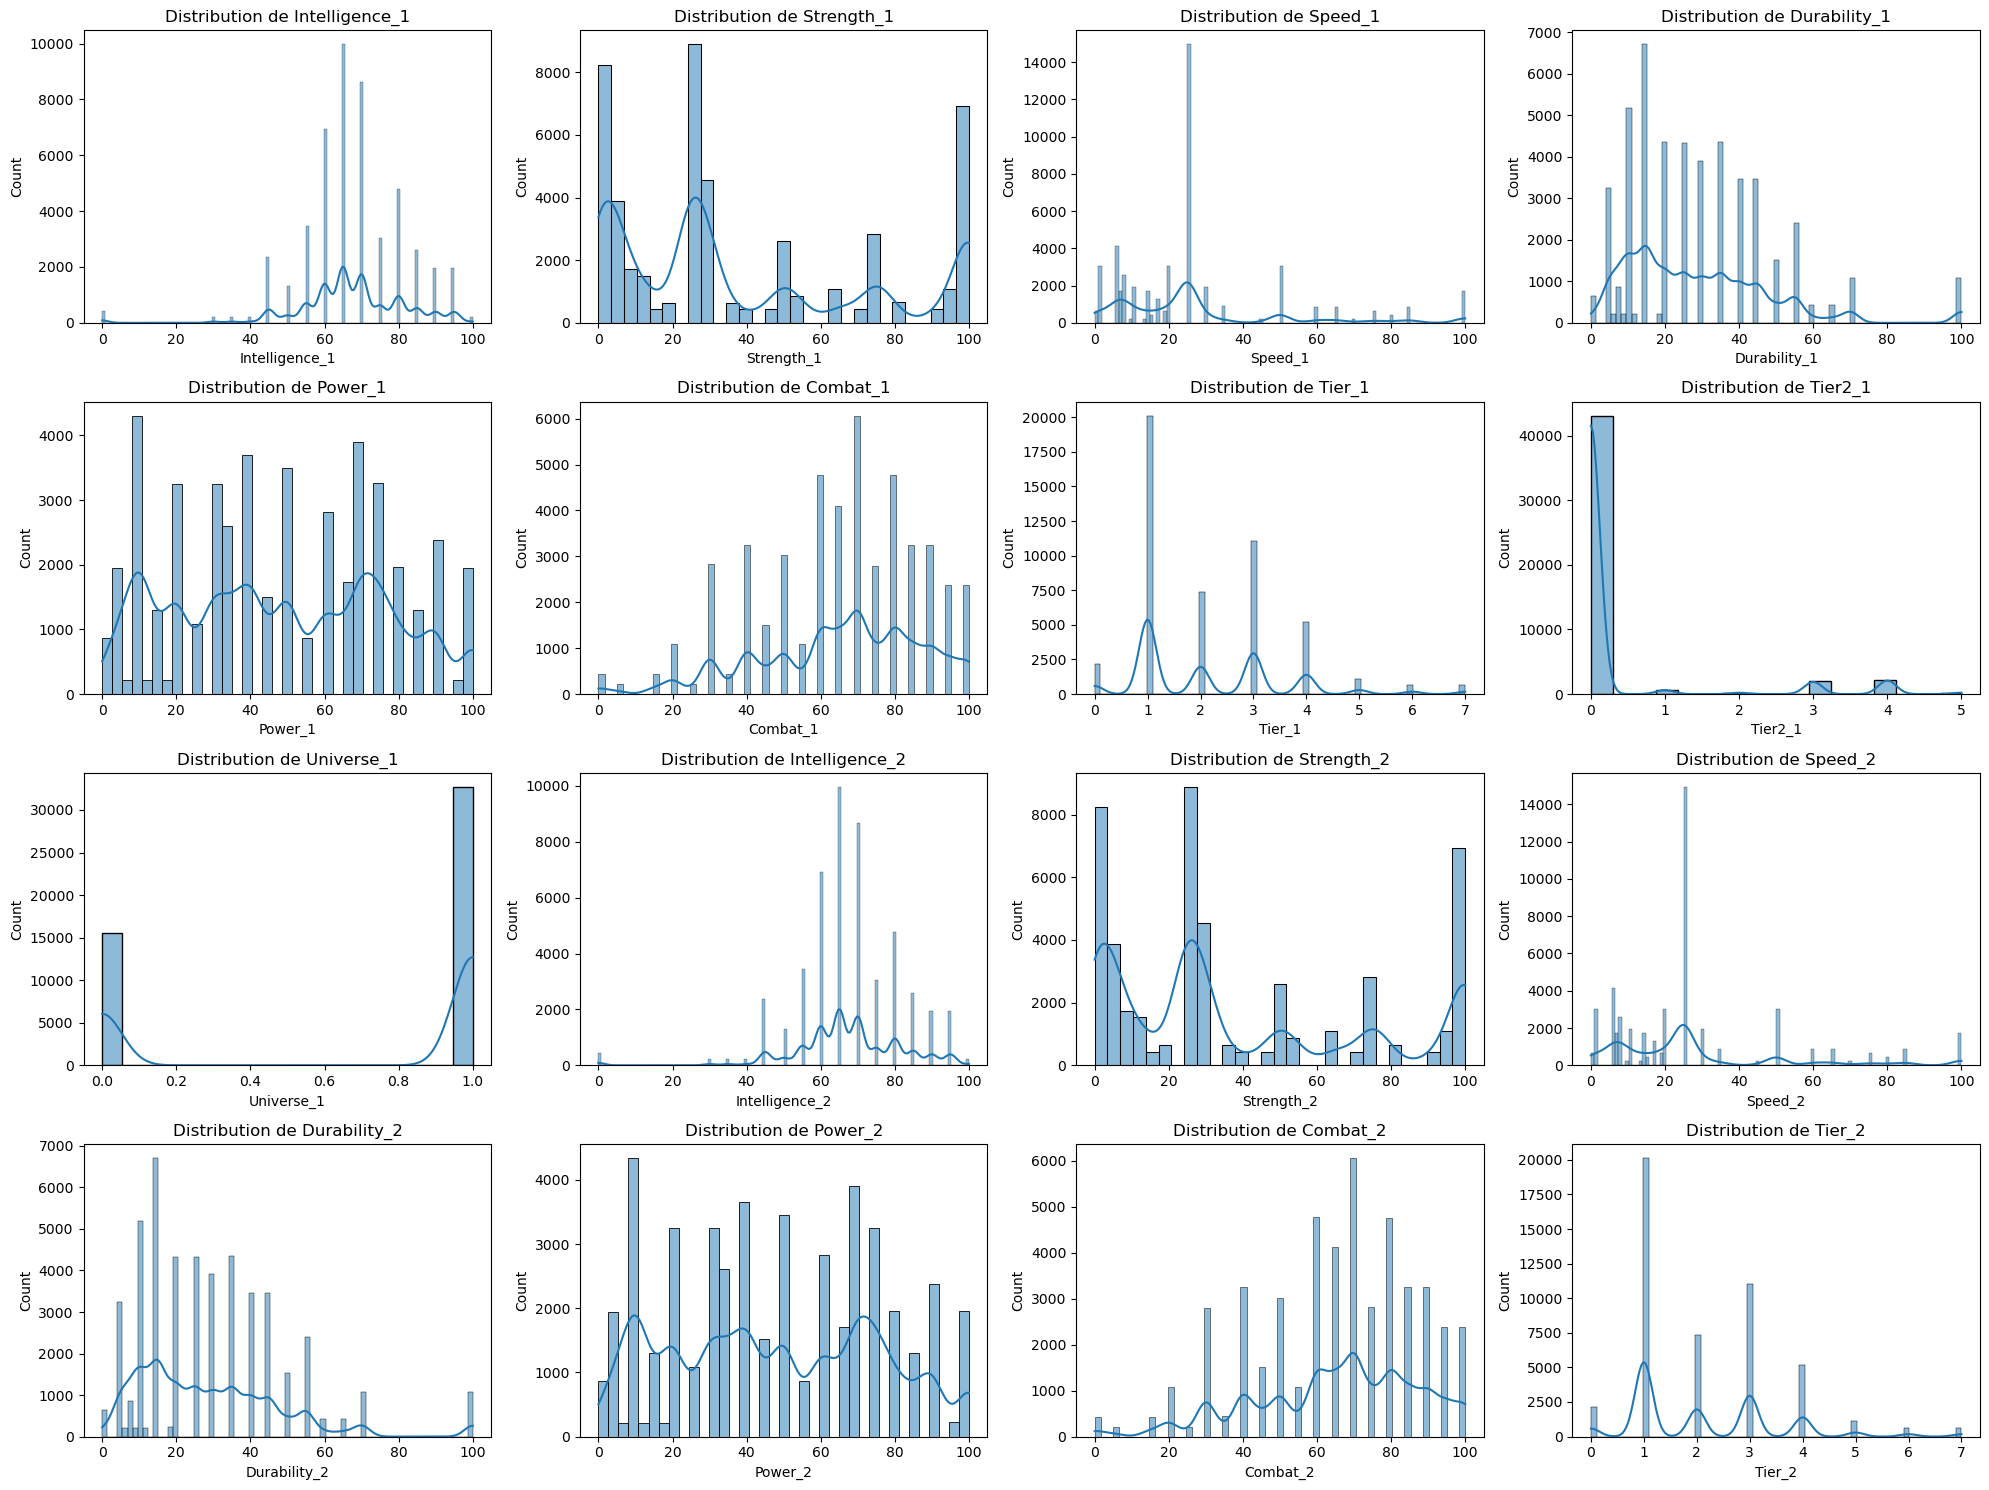

In [53]:
# Visualización de distribuciones
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features[:16]):  # Visualizamos las primeras 16 características numéricas
    plt.subplot(4, 4, i + 1)
    sns.histplot(df_pred_battles[feature], kde=True)
    plt.title(f'Distribution de {feature}')
plt.tight_layout()
plt.show()


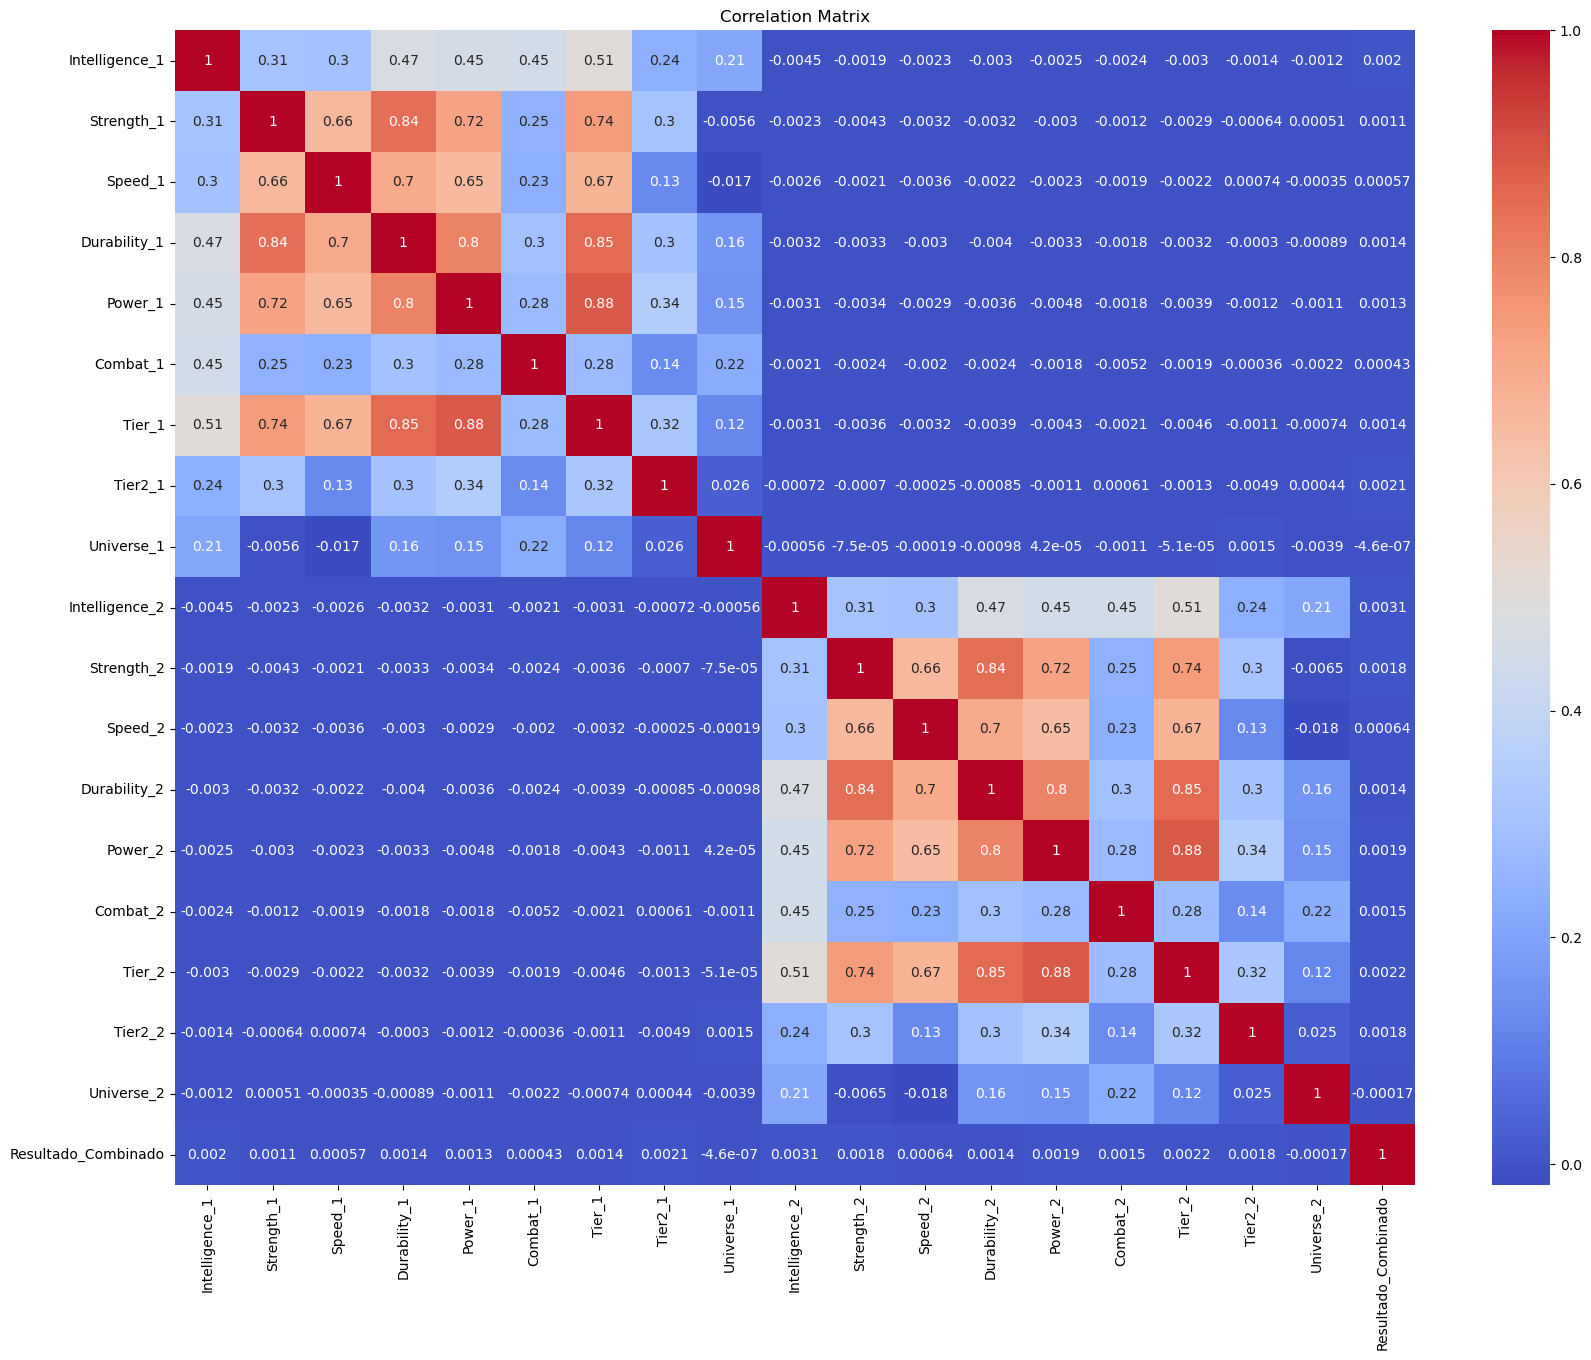

In [55]:
# Correlación entre características y la variable objetivo
correlation_matrix = df_pred_battles[features + ['Resultado_Combinado']].corr()

# Heatmap de la matriz de correlación
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


MODELO CON TODAS FEATURES 

In [57]:
# Definir modelos 
models = {
    'Random Forest': RandomForestClassifier(n_estimators = 100, random_state = 42),
    'XGBoost': XGBClassifier(use_label_encoder = False, eval_metric = 'mlogloss'),
    'Logistic Regression': LogisticRegression(max_iter = 1000),
    'Suport Vector MAchine': SVC()
}

# Pipeline y evaluar modelos 
results = {}
for model_name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('clasifier', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict = True)
    
    results[model_name] = {
        'accuracy': accuracy,
        'classification_report': report
    }

In [58]:
# Mostrar los resultados
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {metrics['accuracy']}")
    print(f"Classification Report: {metrics['classification_report']}")

Model: Random Forest
Accuracy: 0.7824917218543046
Classification Report: {'1': {'precision': 0.7779601887954033, 'recall': 0.7879858657243817, 'f1-score': 0.7829409334985543, 'support': 4811.0}, '2': {'precision': 0.7871008140262993, 'recall': 0.7770451267257367, 'f1-score': 0.7820406470344256, 'support': 4853.0}, 'accuracy': 0.7824917218543046, 'macro avg': {'precision': 0.7825305014108512, 'recall': 0.7825154962250591, 'f1-score': 0.7824907902664899, 'support': 9664.0}, 'weighted avg': {'precision': 0.7825503641105459, 'recall': 0.7824917218543046, 'f1-score': 0.7824888339320791, 'support': 9664.0}}
Model: XGBoost
Accuracy: 0.6426945364238411
Classification Report: {'1': {'precision': 0.6412229617304492, 'recall': 0.6408231136977759, 'f1-score': 0.6410229753612642, 'support': 4811.0}, '2': {'precision': 0.6441515650741351, 'recall': 0.6445497630331753, 'f1-score': 0.6443506025337316, 'support': 4853.0}, 'accuracy': 0.6426945364238411, 'macro avg': {'precision': 0.6426872634022922, 'r

Mejor modelo: **Random Forest** 

Accuracy **0.782**

Precision y Recall **0.78**

F1-score **0.78**

Hiperparametros para RF

In [60]:
# Parámetros para GridSearch
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Crear pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [61]:
# Búsqueda de hiperparámetros
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [None, 10, 20, 30],
                         'classifier__min_samples_leaf': [1, 2, 4],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [50, 100, 200]},
             verbose=2)

In [64]:
# Mejor modelo
best_model = grid_search.best_estimator_

# Prediccion en test
y_pred = best_model.predict(X_test)

# Evaluacion del modelo 
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

Best Parameters: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
Accuracy: 0.7864238410596026
Classification Report:
              precision    recall  f1-score   support

           1       0.79      0.78      0.79      4811
           2       0.79      0.79      0.79      4853

    accuracy                           0.79      9664
   macro avg       0.79      0.79      0.79      9664
weighted avg       0.79      0.79      0.79      9664



Busqueda hiperparametros 

In [68]:
# Parámetros para GridSearch
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30, 40],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': ['auto', 'sqrt', 'log2'],
    'classifier__bootstrap': [True, False],
    'classifier__class_weight': [None, 'balanced']
}

# Búsqueda de hiperparámetros
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Mejor modelo
best_model = grid_search.best_estimator_

# Predicción en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')


Fitting 5 folds for each of 1620 candidates, totalling 8100 fits
Best Parameters: {'classifier__bootstrap': False, 'classifier__class_weight': None, 'classifier__max_depth': None, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 300}
Accuracy: 0.8829677152317881
Classification Report:
              precision    recall  f1-score   support

           1       0.88      0.88      0.88      4811
           2       0.88      0.88      0.88      4853

    accuracy                           0.88      9664
   macro avg       0.88      0.88      0.88      9664
weighted avg       0.88      0.88      0.88      9664

